In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def f(x):
    return np.cos(2 * x) - 2 * np.sin(3 * x)

def L(x, X, k):
    return np.prod([(x - X[i]) / (X[k] - X[i]) for i in range(len(X)) if i != k])

nr = 100

In [99]:
def rezolva1(f, st, dr, N=10, show=True):
    x_gr = np.linspace(st, dr, nr)
    y_gr = f(x_gr)
    if show:
        plt.plot(x_gr, y_gr, label='f(x)')
    
    X = np.linspace(st, dr, N + 1)
    y = f(X)
    if show:
        plt.scatter(X, y, color='black')
    
    A = np.vander(X, N+1, increasing=True)
    b = y.reshape((-1, 1))
    a = np.linalg.solve(A, b)
    
    y_p = P(x_gr, a)
    if not show:
        return y_p
    
    plt.plot(x_gr, y_p, color='orange', linestyle='--', label=f'P(x) cu {N+1} puncte')

    plt.legend()
    plt.show()

In [100]:
def rezolva2(f, st, dr, N=10, show=True):
    x_gr = np.linspace(st, dr, nr)
    y_gr = f(x_gr)
    if show:
        plt.plot(x_gr, y_gr, label='f(x)')
    
    X = np.linspace(st, dr, N + 1)
    y = f(X)
    if show:
        plt.scatter(X, y, color='black')

    def P(x_):
        return np.sum([L(x_, X, i) * y[i] for i in range(len(X))])
    
    y_p = [P(x_) for x_ in x_gr]
    if not show:
        return y_p
    
    plt.plot(x_gr, y_p, color='orange', linestyle='--', label=f'P(x) cu {N+1} puncte')

    plt.legend()
    plt.show()

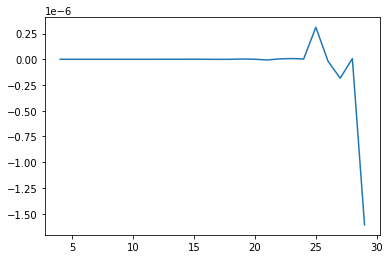

In [132]:
n1, n2 = 4, 30
e1 = np.array([0. for _ in range(n1, n2)])
e2 = np.array([0. for _ in range(n1, n2)])
e3 = np.array([0. for _ in range(n1, n2)])
for n in range(n1, n2):
    y1 = rezolva1(f, -np.pi, np.pi, n, False)
    y2 = rezolva2(f, -np.pi, np.pi, n, False)
    
    x_gr = np.linspace(-np.pi, np.pi, nr)
    y_gr = f(x_gr)
    
    e1[n - n1] = np.sum(np.abs(y1 - y_gr))
    e2[n - n1] = np.sum(np.abs(y2 - y_gr))

# plt.plot(list(range(n1, n2)), e1)
# plt.plot(list(range(n1, n2)), e2)
e3 = e2 - e1
plt.plot(list(range(n1, n2)), e3)
plt.show()

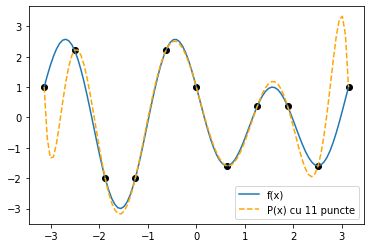

In [135]:
rezolva2(f, -np.pi, np.pi, 10)